In [59]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.density_estimation import XDGMM
from sklearn.mixture import GaussianMixture
import fitsio as fio
import glob
import os
import matplotlib.colors as clr
from scipy import interpolate

In [2]:
Roman_truth_file = '/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/dc2_truth_gal_icrs.fits'
aa = fio.FITS(Roman_truth_file)[-1]
Roman_z = aa.read_column('z')

In [3]:
Roman_output_dir = '/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/dc2_sim_output/'
Roman_match_files = np.sort(glob.glob(os.path.join(Roman_output_dir,'*.fits')))
roman_truth = fio.FITS(Roman_match_files[1])[-1].read()
roman_detection = fio.FITS(Roman_match_files[0])[-1].read()

In [4]:
mm = roman_truth['gal_star'] == 0
roman_ind_all = roman_truth['ind'][mm]
z_all = Roman_z[roman_ind_all]

In [5]:
Red_gal_ind = np.load('data/roman_red_sed_bulge_disk_match_truth_ind.npy')
roman_ind = roman_truth['ind']
matched_inds_in_truth = roman_ind[Red_gal_ind]

zs = Roman_z[matched_inds_in_truth]
measured_qts = roman_detection[Red_gal_ind]
measured_qts_all = roman_detection[mm]

In [6]:
def plot_c_vs_m_roman (ax,c1,c2,ref_m,z_mask,data_z_mask,ref_cut):
    fz = 20
    mag_c1 = measured_qts['mag_auto_%s'%c1][z_mask]
    mag_c2 = measured_qts['mag_auto_%s'%c2][z_mask]
    mag_ref = measured_qts['mag_auto_%s'%ref_m][z_mask]
    
    color = mag_c1-mag_c2
    
    mag_c1_err = measured_qts['magerr_auto_%s'%c1][z_mask]
    mag_c2_err = measured_qts['magerr_auto_%s'%c2][z_mask]
    
    #print(color)
    mag_c1_data = measured_qts_all['mag_auto_%s'%c1][data_z_mask]
    mag_c2_data = measured_qts_all['mag_auto_%s'%c2][data_z_mask]
    mag_ref_data = measured_qts_all['mag_auto_%s'%ref_m][data_z_mask]
    color_data = mag_c1_data-mag_c2_data
    
    
    CUT = mag_ref < ref_cut
    CUT_all = mag_ref_data < ref_cut
    
    ax[0].plot(mag_ref_data[CUT_all],color_data[CUT_all],'.')
    ax[0].plot(mag_ref[CUT],color[CUT],'.')
    #ax.hist(color_data[CUT_all])
    #ax.set_ylim(color.mean()-1,color.mean()+1)
    #ax.set_xlim(mag_ref.mean()-5,mag_ref.mean()-1)
    ax[0].set_ylabel('%s-%s'%(c1,c2),fontsize= 20)
    ax[0].set_xlabel(ref_m,fontsize = 20)
    ax[0].set_xlim(19,23)
    #ax[1].hist(color_data[CUT_all],bins = 20)
    ax[1].hist(color[CUT],bins = 20)
    print(c1,c2,ref_m)
    
    color_err = (mag_c1_err[CUT]**2 + mag_c2_err[CUT]**2)
    
    
    return(mag_ref[CUT],color[CUT],color_err)

In [11]:
def plot_c_vs_m_roman (ax,c1,c2,ref_m,z_mask,data_z_mask,ref_cut):
    fz = 20
    mag_c1 = measured_qts['mag_auto_%s'%c1][z_mask]
    mag_c2 = measured_qts['mag_auto_%s'%c2][z_mask]
    mag_ref = measured_qts['mag_auto_%s'%ref_m][z_mask]
    color = mag_c1-mag_c2
    #print(color)
    mag_c1_err = measured_qts['magerr_auto_%s'%c1][z_mask]
    mag_c2_err = measured_qts['magerr_auto_%s'%c2][z_mask]
    
    mag_c1_data = measured_qts_all['mag_auto_%s'%c1][data_z_mask]
    mag_c2_data = measured_qts_all['mag_auto_%s'%c2][data_z_mask]
    mag_ref_data = measured_qts_all['mag_auto_%s'%ref_m][data_z_mask]
    color_data = mag_c1_data-mag_c2_data
    
    
    CUT = mag_ref < ref_cut
    CUT_all = mag_ref_data < ref_cut
    
    ax[0].plot(mag_ref_data[CUT_all],color_data[CUT_all],'.')
    ax[0].plot(mag_ref[CUT],color[CUT],'.')
    #ax.hist(color_data[CUT_all])
    #ax.set_ylim(color.mean()-1,color.mean()+1)
    #ax.set_xlim(mag_ref.mean()-5,mag_ref.mean()-1)
    ax[0].set_ylabel('%s-%s'%(c1,c2),fontsize= 20)
    ax[0].set_xlabel(ref_m,fontsize = 20)
    ax[0].set_xlim(19,23)
    #ax[1].hist(color_data[CUT_all],bins = 20)
    ax[1].hist(color[CUT],bins = 20)
    color_err = (mag_c1_err[CUT]**2 + mag_c2_err[CUT]**2)
    
    
    return(mag_ref[CUT],color[CUT],color_err)

In [40]:
def get_vals (c1,c2,ref_m,z_mask,ref_cut):
    fz = 20
    mag_c1 = measured_qts['mag_auto_%s'%c1][z_mask]
    mag_c2 = measured_qts['mag_auto_%s'%c2][z_mask]
    mag_ref = measured_qts['mag_auto_%s'%ref_m][z_mask]
    
    color = mag_c1-mag_c2
    
    mag_c1_err = measured_qts['magerr_auto_%s'%c1][z_mask]
    mag_c2_err = measured_qts['magerr_auto_%s'%c2][z_mask]
    
    
    CUT = mag_ref < ref_cut
    
    color_err = (mag_c1_err[CUT]**2 + mag_c2_err[CUT]**2)
    return(mag_ref[CUT],color[CUT],color_err)

In [49]:
l_cut = np.array([21.94663501, 21.98885211, 22.03035709, 22.07131813, 22.11191603,
       22.15166125, 22.19024872, 22.22648818, 22.25714832, 22.27695694,
       22.29738168, 22.31816626, 22.34136902, 22.36735626, 22.3948023 ,
       22.42277609, 22.45451736, 22.48781678, 22.52141397, 22.55499754,
       22.58837916, 22.62078147, 22.65246245, 22.68358576, 22.7142208 ,
       22.74396844, 22.77294752, 22.8013862 , 22.82924991, 22.85624137,
       22.88292686, 22.90711603, 22.92931563, 22.94835376, 22.96137986,
       22.97375732, 22.9852188 , 22.99643028, 23.00796886, 23.02032278,
       23.0338301 , 23.04805114, 23.06266898, 23.07730359, 23.09151186,
       23.10553807, 23.11942077, 23.13353463, 23.14764205, 23.16089315,
       23.17253508, 23.18390382, 23.19500469, 23.20584285, 23.21642333,
       23.22744436, 23.23821735, 23.24874693, 23.25903759, 23.2690937 ,
       23.27499867, 23.28067751, 23.28613425, 23.29137283, 23.29639707])

In [34]:
def XD_1d (color,color_err):
    
    C = color.reshape(-1,1)

    ERR = np.zeros(C.shape + C.shape[-1:])
    for i,j in enumerate(color_err):
        ERR[i][0][0] = j
        
    clf = XDGMM(n_components=1, max_iter=100)
    #Xerr = np.zeros(color.shape + color.shape[-1:])
    clf.fit(C, ERR);    
    mu = clf.mu[0][0]
    sigma = np.sqrt(clf.V[0][0])[0]
    return(mu,sigma)

In [149]:
redshift_start = np.arange(1,2.32,0.02)
ref_m = 'F184'
mu_s2 = []
sigma_s2 = []
for i, z_start in enumerate(redshift_start):
    z_low = z_start
    z_high = z_low + 0.02
    z_mask = (zs > z_low) & (zs < z_high)
    _,color,color_err = get_vals(c1 = fr[1],c2 = fr[2],ref_m=fr[-1],z_mask=z_mask,ref_cut = l_cut[i])
    
    mu,sigma = XD_1d(color,color_err)
    mu_s2.append(mu)
    sigma_s2.append(sigma)

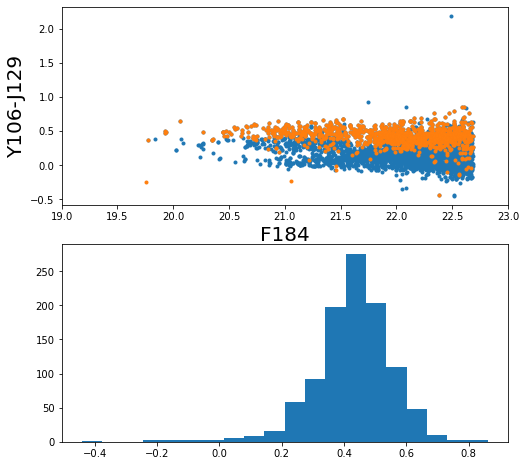

In [36]:
z_low = 1.46
z_high = 1.48
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)
fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(2,1,figsize = (8,8))
m_f,color,color_err = plot_c_vs_m_roman(ax = ax,c1 = fr[1],c2 = fr[2],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 22.683585760737742)
#_,color,color_err = get_vals(c1 = fr[0],c2 = fr[1],ref_m=fr[-1],z_mask=z_mask,ref_cut = 22.297381683083394)

In [29]:
C = color.reshape(-1,1)

ERR = np.zeros(C.shape + C.shape[-1:])
for i,j in enumerate(color_err):
    ERR[i][0][0] = j

clf = XDGMM(n_components=1, max_iter=100)
#Xerr = np.zeros(color.shape + color.shape[-1:])
clf.fit(C, ERR);

In [23]:
x = np.linspace(-0.2, 0.9, 1000)


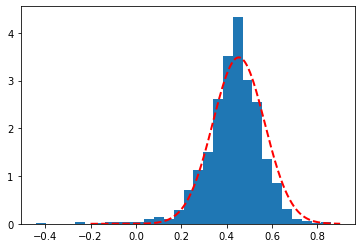

In [38]:
count, bins, ignored = plt.hist(color,bins = 30, density=True)
mu = clf.mu[0][0]
sigma = np.sqrt(clf.V[0][0])[0]
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (x - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r',ls = '--')

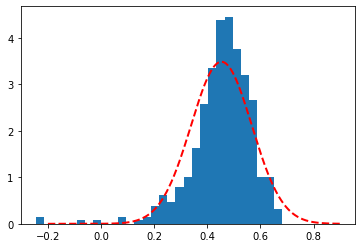

In [33]:
count, bins, ignored = plt.hist(color,bins = 30, density=True)
mu = clf.mu[0][0]
sigma = np.sqrt(clf.V[0][0])[0]
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (x - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r',ls = '--')

In [95]:
l_cut = np.array([21.19406002, 21.23627712, 21.2777821 , 21.31874314, 21.35934104,
       21.39908626, 21.43767373, 21.47391319, 21.50457333, 21.52438195,
       21.54480669, 21.56559127, 21.58879403, 21.61478127, 21.64222731,
       21.6702011 , 21.70194238, 21.7352418 , 21.76883898, 21.80242255,
       21.83580417, 21.86820648, 21.89988746, 21.93101077, 21.96164581,
       21.99139345, 22.02037253, 22.04881121, 22.07667492, 22.10366638,
       22.13035187, 22.15454104, 22.17674064, 22.19577877, 22.20880488,
       22.22118233, 22.23264381, 22.24385529, 22.25539387, 22.26774779,
       22.28125511, 22.29547615, 22.31009399, 22.3247286 , 22.33893687,
       22.35296308, 22.36684578, 22.38095965, 22.39506706, 22.40831816,
       22.41996009, 22.43132883, 22.4424297 , 22.45326786, 22.46384834,
       22.47486937, 22.48564236, 22.49617194, 22.5064626 , 22.51651871,
       22.52242368, 22.52810252, 22.53355926, 22.53879784, 22.54382208,
       22.5366523 ])

In [96]:
redshift_start = np.arange(1,2.32,0.02)
ref_m = 'F184'
for i, z_start in enumerate(redshift_start):
    z_low = z_start
    z_high = z_low + 0.02
    z_mask = (zs > z_low) & (zs < z_high)
    mag_ref = measured_qts['mag_auto_%s'%ref_m][z_mask]
    L_cut = (mag_ref < l_cut[i])
    group_z = zs[z_mask][L_cut]
    
    mag_Y = measured_qts['mag_auto_Y106'][z_mask]
    mag_J = measured_qts['mag_auto_J129'][z_mask]
    mag_H = measured_qts['mag_auto_H158'][z_mask]
    mag_F = measured_qts['mag_auto_F184'][z_mask]
    Y_J = mag_Y[L_cut] - mag_J[L_cut]
    J_H = mag_J[L_cut] - mag_H[L_cut]
    H_F = mag_H[L_cut] - mag_F[L_cut]
    #print(np.round(z_low,2),np.round(z_high,2),len(Y_J),l_cut[i])
    if i == 0:
        Y_J_group = Y_J
        J_H_group = J_H
        H_F_group = H_F
        redshift_group = group_z
    else:
        Y_J_group = np.concatenate((Y_J_group,Y_J))
        J_H_group = np.concatenate((J_H_group,J_H))
        H_F_group = np.concatenate((H_F_group,H_F))
        redshift_group = np.concatenate((redshift_group,group_z))

In [97]:
roman_data_dir = 'data/roman/'
roman_files = os.listdir(roman_data_dir)
if'.ipynb_checkpoints' in roman_files:
    roman_files.remove('.ipynb_checkpoints')
    
roman_redshift = np.arange(0.5,2.75,0.01)

roman_color_comb = [['F062','F087'],['F087','F106'],['F106','F129'],['F129','F158'],['F158','F184'],['F184','F213']]
#roman_color_comb = [['F106','F129'],['F129','F158'],['F158','F184']]

In [57]:
plot_m = roman_redshift < 2.3

In [179]:
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [155]:
# Selecting nodes for spline interpolation
select_mu2 = []
select_sigma2 = []
select_z = []
for i in range(len(redshift_start)):
    
    if i%5 == 0:
        select_z.append(redshift_start[i])
        select_mu2.append(mu_s2[i])
        select_sigma2.append(sigma_s2[i])

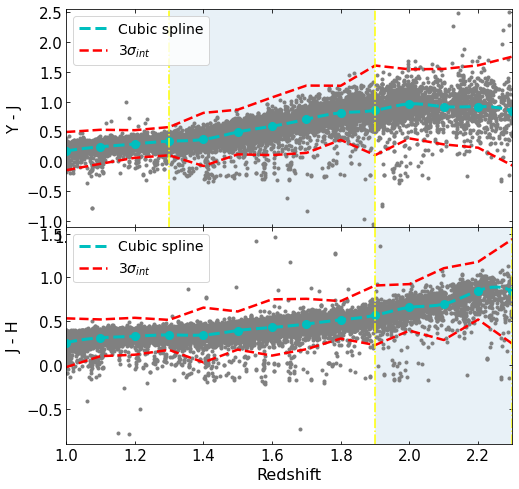

In [198]:
plt.figure(figsize = (8,8))
plt.subplots_adjust(hspace=0.0)
plt.subplot(211)
#for i,f in enumerate(roman_files[-10:]):
#    single_gal_color = np.load(os.path.join(roman_data_dir,f))
#    plt.plot(roman_redshift[plot_m],single_gal_color[:,2][plot_m],ls = '--',linewidth = 3)
    
#    if i == 3:
#        plt.plot(roman_redshift[plot_m],single_gal_color[:,2][plot_m],ls = '--',linewidth = 3,label = 'Prediction from DC2 LRG')
#plt.hist2d(redshift_group,Y_J_group, bins=100, cmap='YlOrRd', norm=clr.LogNorm()); 
plt.plot(redshift_group,Y_J_group,'.',color = 'grey')

tck = interpolate.splrep(select_z, select_mu, s=0)
ynew = interpolate.splev(redshift_start, tck, der=0)
plt.plot(redshift_start,ynew,'c--',label = 'Cubic spline',linewidth = 3)

plt.plot(select_z,select_mu,'co',markersize=8)
plt.plot(select_z,np.array(select_mu)+np.array(select_sigma)*3,'r--',linewidth = 2.5,label = r'$3\sigma_{int}$')
plt.plot(select_z,np.array(select_mu)-np.array(select_sigma)*3,'r--',linewidth = 2.5)

plt.axvspan(1.3,1.9,alpha = 0.1)
plt.axvline(1.3,color = 'yellow',ls = '-.')
plt.axvline(1.9,color = 'yellow',ls = '-.')
plt.xlim(1,2.3)
plt.ylim(-1.1,2.55)
plt.ylabel('Y - J',fontsize = 15)
plt.xlabel('Redshift',fontsize = 15)
plt.legend(fontsize = 14,loc = 'upper left')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.subplot(212)
plt.plot(redshift_group,J_H_group,'.',color = 'grey');


tck2 = interpolate.splrep(select_z, select_mu2, s=0)
ynew2 = interpolate.splev(redshift_start, tck2, der=0)
plt.plot(redshift_start,ynew2,'c--',label = 'Cubic spline',linewidth = 3)

plt.plot(select_z,select_mu2,'co',markersize=8)
plt.plot(select_z,np.array(select_mu2)+np.array(select_sigma2)*3,'r--',linewidth = 2.5,label = r'$3\sigma_{int}$')
plt.plot(select_z,np.array(select_mu2)-np.array(select_sigma2)*3,'r--',linewidth = 2.5)


plt.legend(fontsize = 14,loc = 'best')

plt.axvspan(1.9,2.3,alpha = 0.1)
plt.axvline(1.9,color = 'yellow',ls = '-.')
plt.axvline(2.3,color = 'yellow',ls = '-.')
plt.xlim(1,2.3)
plt.ylabel( 'J - H',fontsize = 16)
plt.xlabel('Redshift',fontsize = 16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);
#plt.axvline(1.3)
#plt.axvline(1.8)
#plt.savefig('plots/roman_lrg_c_vs_z.pdf')